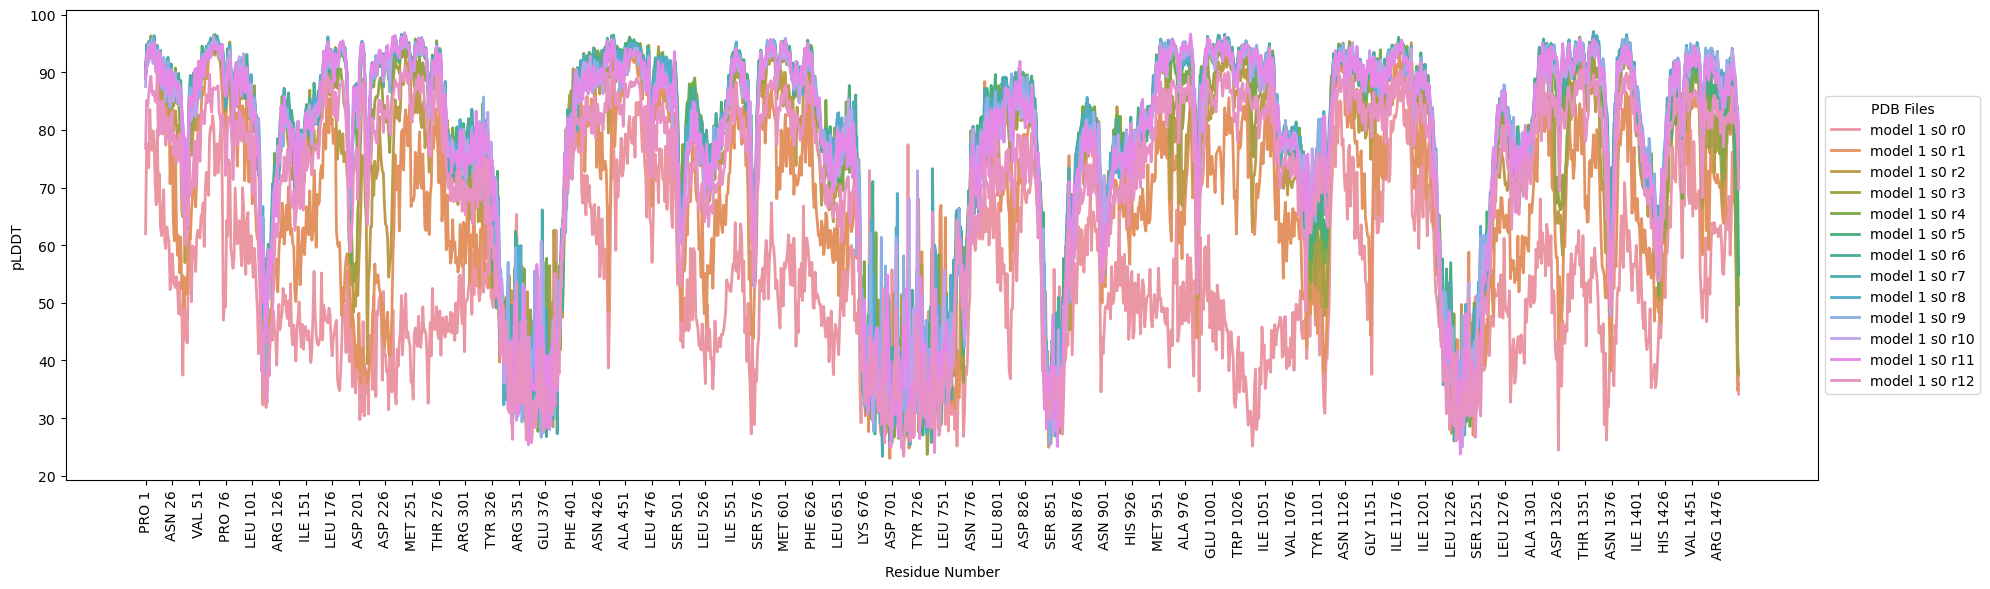

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import re

def extractBFactor(pdbFile, chainID):
    patternATOM = re.compile(
        r'^ATOM\s+\d+\s+CA\s+([A-Z]{3})\s+' + re.escape(chainID) + r'\s*(\d+)\s+[-+]?\d*\.\d+\s+[-+]?\d*\.\d+\s+[-+]?\d*\.\d+\s+\d*\.\d+\s+(\d+\.\d+)'
    )
    bFactors = {}

    with open(pdbFile, 'r') as file:
        for line in file:
            if line.startswith("ATOM") and " CA " in line:
                atomInfo = re.search(patternATOM, line)
                if atomInfo:
                    resName = atomInfo.group(1)
                    resNumber = int(atomInfo.group(2))
                    bFactor = float(atomInfo.group(3))
                    bFactors[resName + ' ' + str(resNumber)] = bFactor

    return bFactors

def pLDDT_plot(pdbDict, colors):
    plt.figure(figsize=(20, 6))

    for (alias, (pdbFile, chainID)), color in zip(pdbDict.items(), colors):
        bFactorDic = extractBFactor(pdbFile, chainID)
        residues = list(bFactorDic.keys())
        myBFactors = [bFactorDic[res] for res in residues]

        x_vals = np.arange(len(myBFactors))
        y_vals = np.array(myBFactors)

        plt.plot(x_vals, y_vals, label=f'{alias}', color=color, linewidth=2)

        tick_positions = [i for i in range(len(residues)) if (i % 25 == 0)]
        tick_labels = [residues[i] for i in tick_positions]
        plt.xticks(ticks=tick_positions, labels=tick_labels, rotation='vertical')

    plt.ylabel('pLDDT')
    plt.xlabel('Residue Number')
    
    # Move the legend outside the plot
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="PDB Files", fontsize=10)
    plt.tight_layout()
    plt.show()

colors = [
    '#ea96a3',  # Recycle 0
    '#e39361',  # Recycle 1
    '#be9b4a',  # Recycle 2
    '#9fa046',  # Recycle 3
    '#7aaa48',  # Recycle 4
    '#48af79',  # Recycle 5
    '#4aac99',  # Recycle 6
    '#4dabae',  # Recycle 7
    '#53acc9',  # Recycle 8
    '#8eaee7',  # Recycle 9
    '#bfa3ea',  # Recycle 10
    '#e689e6',  # Recycle 11
    '#e891c3'   # Recycle 12
]

# Example usage
folder= '/Users/adrianahernandezgonzalez/LabNotebook/10-24/states/partialAlphaCaV12HS8HLPlocalrun_b3702_32_64_10/pdb/'
pdbFile0 = folder+'model_1_ptm_r0_seed0.pdb'
pdbFile1 = folder+'model_1_ptm_r1_seed0.pdb'
pdbFile2 = folder+'model_1_ptm_r2_seed0.pdb'
pdbFile3 = folder+'model_1_ptm_r3_seed0.pdb'
pdbFile4 = folder+'model_1_ptm_r4_seed0.pdb'
pdbFile5 = folder+'model_1_ptm_r5_seed0.pdb'
pdbFile6 = folder+'model_1_ptm_r6_seed0.pdb'
pdbFile7 = folder+'model_1_ptm_r7_seed0.pdb'
pdbFile8 = folder+'model_1_ptm_r8_seed0.pdb'
pdbFile9 = folder+'model_1_ptm_r9_seed0.pdb'
pdbFile10 = folder+'model_1_ptm_r10_seed0.pdb'
pdbFile11 = folder+'model_1_ptm_r11_seed0.pdb'
pdbFile12 = folder+'model_1_ptm_r12_seed0.pdb'

# Now the dictionary accepts alias as the key, and (filename, chainID) as the value
pdb_dict = {
    'model 1 s0 r0': (pdbFile0, 'A'),
    'model 1 s0 r1': (pdbFile1, 'A'),
    'model 1 s0 r2': (pdbFile2, 'A'),
    'model 1 s0 r3': (pdbFile3, 'A'),
    'model 1 s0 r4': (pdbFile4, 'A'),
    'model 1 s0 r5': (pdbFile5, 'A'),
    'model 1 s0 r6': (pdbFile6, 'A'),
    'model 1 s0 r7': (pdbFile7, 'A'),
    'model 1 s0 r8': (pdbFile8, 'A'),
    'model 1 s0 r9': (pdbFile9, 'A'),
    'model 1 s0 r10': (pdbFile10, 'A'),
    'model 1 s0 r11': (pdbFile11, 'A'),
    'model 1 s0 r12': (pdbFile12, 'A')
}

pLDDT_plot(pdb_dict, colors)
